# Quantum Computing Tutorial with IBM Qiskit  

## Part 2: An Introduction to Quantum Computing 
&nbsp; 

*by Jaimie Greasley*

&nbsp; 

## Objectives:

1. To demonstrate the use of basic operational elements of quantum circuits, i.e. quantum gates. 
2. To demonstrate some properties of quantum mechanics with quantum circuit 

&nbsp; 

## To Get Started 

- Visit [IBM Quantum Computing website](https://quantum-computing.ibm.com/) and create a ***free*** IBM account.  
- Install Qiskit for your Python editor. Import qiskit tools in your preamble and start programming. 


&nbsp; 

## 1. Installing Qiskit

For installing Qiskit onto your computer, follow [these](https://qiskit.org/documentation/getting_started.html) instructions.  


&nbsp; 

## 2. Jupyter -- Import Qiskit 

* Importing Qiskit and seeing the version we have installed.
* In order to ensure that we have the most recent version, visit [qiskit.org](https://qiskit.org/).  

&nbsp; 

In [1]:
import qiskit 

In [ ]:
qiskit.__qiskit_version__

&nbsp; 

* We can also import specific functions like below. We'll be needing these for the present tutorial. 

In [ ]:
from qiskit import QuantumCircuit, assemble, Aer 
from qiskit.visualization import plot_bloch_multivector, plot_histogram

&nbsp; 

In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram

&nbsp; 

## 3. IBM Quantum Experience 

* The layout of IBM Q Experience and Circuit Composer  
* Buiding a circuit with the Circuit Composer- Gates, Measurements, Visualizations 
* Choosing our settings and running jobs with a quantum simulator or quantum computer
* Viewing results 

Here's a [list](https://quantum-computing.ibm.com/services?services=systems) of IBM's global systems and simulators. 

&nbsp; 

## 4. Jupyter -- Building a Circuit

Let's create and define a quantum circuit with 3 qubits ($q_0, q_1, q_2$) and 3 classical bits ($c_0, c_1, c_2$) for measurement.

In order to draw the circuit, we use the *draw()* function. 

&nbsp; 

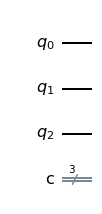

In [3]:
QC=QuantumCircuit(3,3)
QC.draw(output='mpl')

We may add gates to our circuit. Let's create a **superposed** state on $q_0$ by adding a Hadamard gate. 

$$ H|0\rangle\rightarrow|0\rangle+|1\rangle $$

$$ H|0\rangle=\tfrac{1}{\sqrt{2}}|0\rangle+ \tfrac{1}{\sqrt{2}}|1\rangle $$

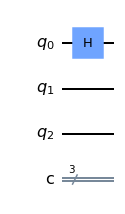

In [4]:
QC.h(0)
QC.draw(output='mpl')

To measure the classical output of $q_0$, we use the *measure()* command. 

In [ ]:
QC.measure(0,0)
QC.draw(output='mpl')

&nbsp; 

## 5. Obtaining Results 

Getting the results from our circuit would require accessing IBMs systems/simulators. 

&nbsp;

We define the following: 

In [5]:
sim = Aer.get_backend('aer_simulator')
svsim = Aer.get_backend('statevector_simulator')
qasim= Aer.get_backend('qasm_simulator')

&nbsp; 

And now to set up the job and get the results... 

Let's start with a **histogram**. 

In [ ]:
qjob=assemble(QC)
counts = sim.run(qjob).result().get_counts() 
plot_histogram(counts)

&nbsp; 

We may obtain results in other forms as well. 

Let's get the ***state vector*** of our circuit. 


For a 3 qubit system, we expect a state vector of dimension $2^3$. Possible permutations are: 


$$ |000\rangle,|001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle,|111\rangle $$

&nbsp; 

In [ ]:
final_state=svsim.run(qjob).result().get_statevector()
print(final_state)

&nbsp; 

We can get our results in a better format using *array_to_latex*. 

In [ ]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

&nbsp; 

Let's get the **Unitary** for the circuit. We'll have to restart the kernel and clear the output making sure not to run the measurement code. 

&nbsp; 

In [6]:
from qiskit.visualization import array_to_latex
QC.save_unitary()
qjob = assemble(QC)
unitary = sim.run(qjob).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

&nbsp; 

## 6. Bloch Sphere Visualization 
&nbsp;

Let's create a new circuit and see the **Bloch Sphere** representation.

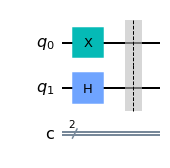

In [7]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt

QC= QuantumCircuit(2,2)
QC.x(0)
QC.h(1)
QC.save_statevector() 
QC.draw(output='mpl')


C:\Users\jaimi\anaconda3\envs\ENV_NAME\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


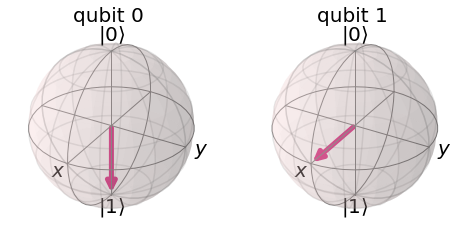

In [8]:
qjob=assemble(QC)
state = sim.run(qjob).result().get_statevector()
plot_bloch_multivector(state)

&nbsp;

We can also define an *initial state* for any qubit. We just have to make sure that its **normalized**. 

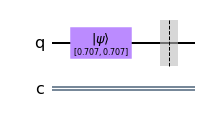

In [9]:
initial= [1/sqrt(2), 1/sqrt(2)]
QC= QuantumCircuit(1,1)

QC.initialize(initial,0)
QC.save_statevector() 
QC.draw(output='mpl')

C:\Users\jaimi\anaconda3\envs\ENV_NAME\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


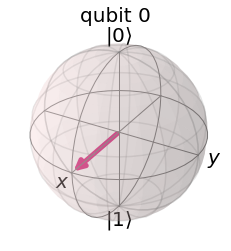

In [10]:
qjob=assemble(QC)
state = sim.run(qjob).result().get_statevector()
plot_bloch_multivector(state)

&nbsp;
- Check out this Bloch Sphere [Simulation](https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html) 

&nbsp;



## 7. Entanglement 
&nbsp;

### Creating an entangled state.

An maximally-entangled state may be generated using 2 qubits, a two gates (Hadamard & controlled-NOT). 

&nbsp;

Here's how: 


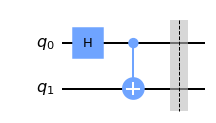

In [11]:
EC= QuantumCircuit(2)
EC.h(0)
EC.cx(0,1)
EC.save_statevector()
EC.draw(output='mpl')

In [12]:
from qiskit.visualization import array_to_latex
qjob=assemble(EC)
state = sim.run(qjob).result().get_statevector()
array_to_latex(state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

Our state vector is: 
$$ |\Psi\rangle=\tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{1}{\sqrt{2}} |11\rangle $$
&nbsp;
$$|\Psi\rangle \neq  q_1 \otimes q_0 $$ 

If $|q_1\rangle=|0\rangle $, then $$|\Psi\rangle= |0\rangle \otimes (|0\rangle + |1\rangle)$$
&nbsp;
$$|\Psi\rangle= |00\rangle + |01\rangle)$$
&nbsp;

Or if $|q_1\rangle=|1\rangle $, then  $$|\Psi\rangle= |1\rangle \otimes (|0\rangle + |1\rangle)$$ 
&nbsp;
$$|\Psi\rangle= |10\rangle + |11\rangle)$$
&nbsp;

Therefore, we **cannot** describe our quantum state $|\Psi\rangle$ as a tensor product of two individual qubit states (it cannot be *factorized*). It may only be described as the entangled system.  

&nbsp; 

**What happens when we measure the qubits?**

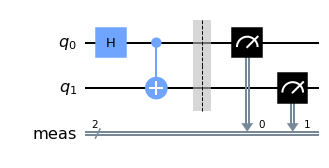

In [13]:
EC= QuantumCircuit(2)
EC.h(0)
EC.cx(0,1)
EC.measure_all()
EC.draw(output='mpl')

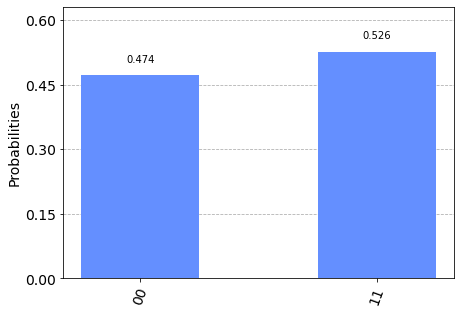

In [16]:
qjob=assemble(EC)
counts = sim.run(qjob).result().get_counts() 
plot_histogram(counts)

&nbsp;

This is different to if we had an unentangled state. For example, consider the following circuit. 

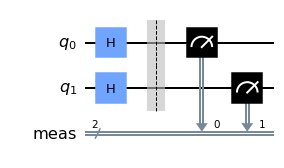

In [17]:
UNEC= QuantumCircuit(2)
UNEC.h(0)
UNEC.h(1)
UNEC.measure_all()
UNEC.draw(output='mpl')

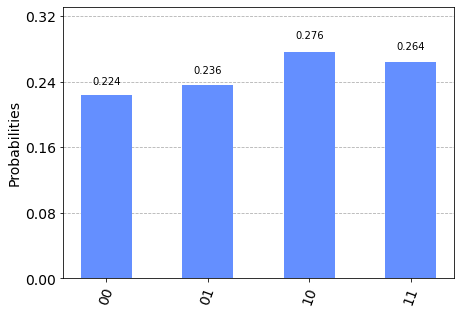

In [18]:
qjob=assemble(UNEC)
counts = sim.run(qjob).result().get_counts() 
plot_histogram(counts)

&nbsp;

## 8. Quantum Teleportation 
&nbsp;


&nbsp;

![title](Desktop/Teleportation.png)

# Extras 

### Qiskit 

- Subscribe to [Qiskit's YouTube channel](https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A)
- Join [Qiskit's Slack channel](https://quantum-computing.ibm.com/support)
- Learn Qiskit with the [Qiskit textbook](https://qiskit.org/textbook/preface.html)!  
- Available Qiskit [Algorithms](https://qiskit.org/overview/#algorithms) 


### Interested in Quantum Physics & Computing? 
- Check out this cool [map of Quantum Physics](https://www.flickr.com/photos/95869671@N08/50211268918) by *Domain of Science* 
- Get to better understand Quantum Mechanics & Computing principles with this excellent **Hello Quantum** [game](http://helloquantum.mybluemix.net/)
- Take the **Are You Ready for Quantum Computing?** [short quiz](https://www.113.vovici.net/se/13B2588B1B6A9606/lang/en-US/96b11fd1-3409-471c-a07e-59aed4f66d0f_1086454440) by the *Boston Consulting Group* to see what you understand about quantum computing 


# Questions ? 

